# Explore here

Usaremos la API de Kaggle para descargar los datos del proyecto

In [5]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# ya que hemos instalado la API de Kaggle procedemos a descrgar los archivos
'''
import os

# Nombre de la competencia en Kaggle
competition = 'isic-2024-challenge'

# Carpeta donde guardar los archivos descargados
download_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos proyecto cancer/descargas_isic2024'
os.makedirs(download_folder, exist_ok=True)

# Comando para descargar los datos
os.system(f'kaggle competitions download -c {competition} -p "{download_folder}"')

print(f'Datos descargados y guardados en {download_folder}')
'''

'\nimport os\n\n# Nombre de la competencia en Kaggle\ncompetition = \'isic-2024-challenge\'\n\n# Carpeta donde guardar los archivos descargados\ndownload_folder = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos proyecto cancer/descargas_isic2024\'\nos.makedirs(download_folder, exist_ok=True)\n\n# Comando para descargar los datos\nos.system(f\'kaggle competitions download -c {competition} -p "{download_folder}"\')\n\nprint(f\'Datos descargados y guardados en {download_folder}\')\n'

In [7]:
#comprobamos la existencia de los archivos descargados

download_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge'

for file_name in os.listdir(download_folder):
    print(file_name)

NaN_images.zip
.DS_Store
train-image
NaN_images
Filtered_images
train-metadata.csv
test-image.hdf5
train-image.hdf5
test-metadata.csv
Filtered_images.zip
sample_submission.csv


In [8]:
#una vez descargado cargamos el csv y revisamos

# Ruta del archivo CSV
file_path = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/train-metadata.csv'

# Cargar el archivo CSV en un DataFrame
metadata = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame
metadata.head()

/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_5818/1076217968.py:7: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [9]:
# Tamaño del DataFrame
print("Tamaño del DataFrame:", metadata.shape)

# Información sobre las columnas y tipos de datos
print(metadata.info())

# Resumen estadístico de las columnas numéricas
print(metadata.describe())

# Revisión de valores nulos
print(metadata.isnull().sum())

Tamaño del DataFrame: (401059, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Be

revisamos la columna patient_id ya que tenemos la certeza de que hay valores duplicados, con seguridad hay muchas muestras que pertenecen al mismo paciente, esto nos ayudará a llenar los datos faltantes

In [10]:
# Imprimir el número de registros únicos en la columna 'patient_id'
print(f"Número de pacientes únicos en 'patient_id': {metadata['patient_id'].nunique()}")

# Imprimir el número total de registros en el DataFrame
print(f"Número total de registros en el DataFrame: {len(metadata)}")

Número de pacientes únicos en 'patient_id': 1042
Número total de registros en el DataFrame: 401059


Al revisar el Df metadata nos damos cuentas que por ejemplo en la columna "sex" faltan datos, procederemos a comprobarlos.

In [11]:
# Imprimir los valores únicos en la columna 'sex'
print(f"Valores únicos en 'sex': {metadata['sex'].unique()}")

# Imprimir la frecuencia de cada valor en la columna 'sex'
print("Frecuencia de cada valor en 'sex':")
print(metadata['sex'].value_counts())

# Imprimir la frecuencia de cada valor en la columna 'sex', incluyendo los NaN
print("Frecuencia de cada valor en 'sex' (incluyendo NaN):")
print(metadata['sex'].value_counts(dropna=False))

Valores únicos en 'sex': ['male' 'female' nan]
Frecuencia de cada valor en 'sex':
sex
male      265546
female    123996
Name: count, dtype: int64
Frecuencia de cada valor en 'sex' (incluyendo NaN):
sex
male      265546
female    123996
NaN        11517
Name: count, dtype: int64


/var/folders/sc/w6cv9_291mqc4c1m0qn06_4m0000gn/T/ipykernel_5818/4151913827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_nan', data=metadata, order=value_counts.index, palette=colors)


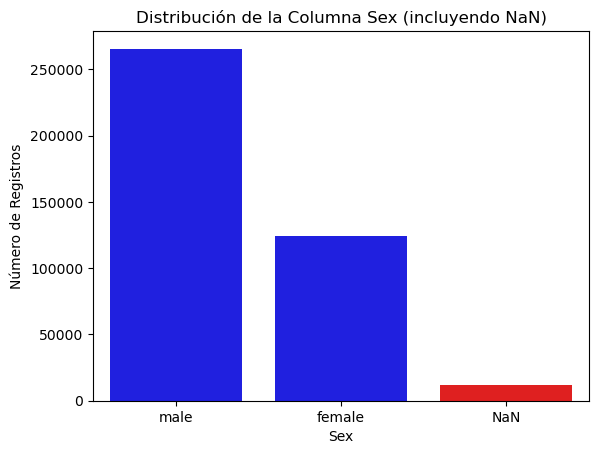

In [24]:
# graficamos para verificar los datos de la columna "sex" incluyendo valores NaN como tercera columna

# Agregar una categoría 'NaN' para los valores faltantes en 'sex'
metadata['sex_nan'] = metadata['sex'].fillna('NaN')

# Contar la frecuencia de cada categoría en 'sex_nan'
value_counts = metadata['sex_nan'].value_counts()

# Definir los colores para cada categoría, asignando rojo ('red') a 'NaN'
colors = ['red' if category == 'NaN' else 'blue' for category in value_counts.index]

# Crear un gráfico de barras de la distribución de 'sex', incluyendo 'NaN'
sns.countplot(x='sex_nan', data=metadata, order=value_counts.index, palette=colors)
plt.title('Distribución de la Columna Sex (incluyendo NaN)')
plt.xlabel('Sex')
plt.ylabel('Número de Registros')
plt.show()

Comprobaremos la columna "age_approx" para verificar la existencia de valores nulos o NaN

In [13]:
# Verificar el tipo de datos de la columna 'age_approx'
print(f"Tipo de datos de la columna 'age_approx': {metadata['age_approx'].dtype}")

# Contar los tipos de datos distintos en la columna 'age_approx'
print(f"Tipos de datos distintos en 'age_approx':")
print(metadata['age_approx'].apply(type).value_counts())

# Contar los valores nulos (NaN) en la columna 'age_approx'
print(f"Valores nulos en 'age_approx': {metadata['age_approx'].isna().sum()}")

Tipo de datos de la columna 'age_approx': float64
Tipos de datos distintos en 'age_approx':
age_approx
<class 'float'>    401059
Name: count, dtype: int64
Valores nulos en 'age_approx': 2798


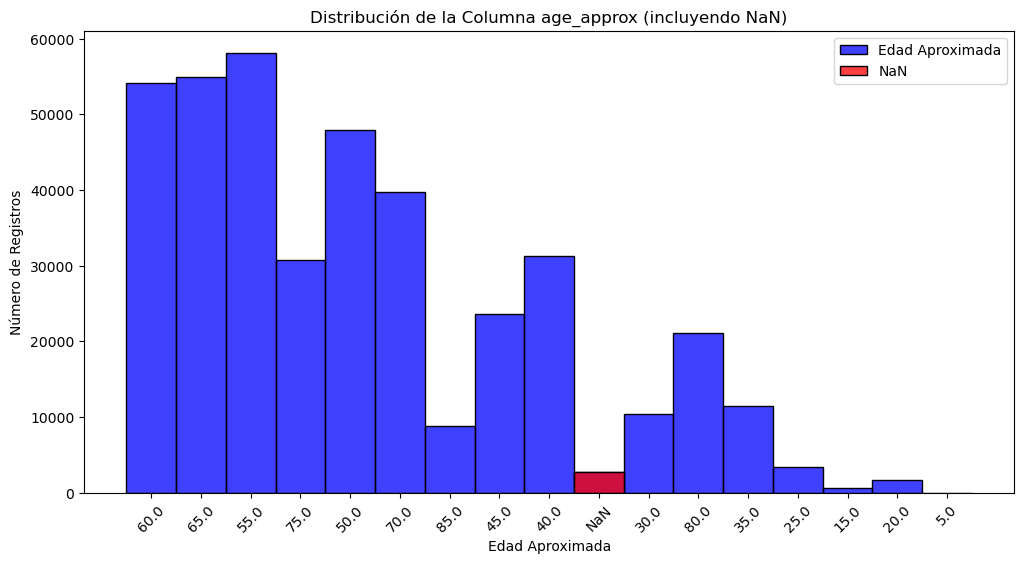

In [14]:
#Graficaremos para visualizar la explicabilidad de los Datos

# Crear una columna 'age_approx_nan' para marcar los valores nulos
metadata['age_approx_nan'] = metadata['age_approx'].astype(str).replace('nan', 'NaN')


# Crear un histograma de la distribución de 'age_approx', incluyendo 'NaN'
plt.figure(figsize=(12, 6))

sns.histplot(data=metadata, x='age_approx_nan', discrete=True, kde=False, bins=30, color='blue', label='Edad Aproximada')

# Añadir una segunda serie para la categoría 'NaN' y colorearla en rojo
for age in metadata['age_approx_nan'].unique():
    if age == 'NaN':
        sns.histplot(metadata[metadata['age_approx_nan'] == 'NaN'], x='age_approx_nan', discrete=True, kde=False, bins=30, color='red', label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna age_approx (incluyendo NaN)')
plt.xlabel('Edad Aproximada')
plt.ylabel('Número de Registros')

# Añadir leyenda
plt.legend()

# Ajustar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Ahora verificaremos la columna anatom_site_general para la comprobacion de valores nulos y tratarlos

In [15]:
# Verificar los valores únicos en la columna 'anatom_site_general'
unique_values = metadata['anatom_site_general'].unique()
print(f"Valores únicos en 'anatom_site_general': {unique_values}")

# Contar los valores nulos en la columna 'anatom_site_general'
null_count = metadata['anatom_site_general'].isna().sum()
print(f"Cantidad de valores nulos en 'anatom_site_general': {null_count}")

# Verificar el conteo de cada valor único, incluyendo los valores nulos
value_counts = metadata['anatom_site_general'].value_counts(dropna=False)
print(f"Conteo de cada valor único en 'anatom_site_general':\n{value_counts}")

Valores únicos en 'anatom_site_general': ['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]
Cantidad de valores nulos en 'anatom_site_general': 5756
Conteo de cada valor único en 'anatom_site_general':
anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
NaN                  5756
Name: count, dtype: int64


Graficaremos para obtener la explicabilidad de los datos

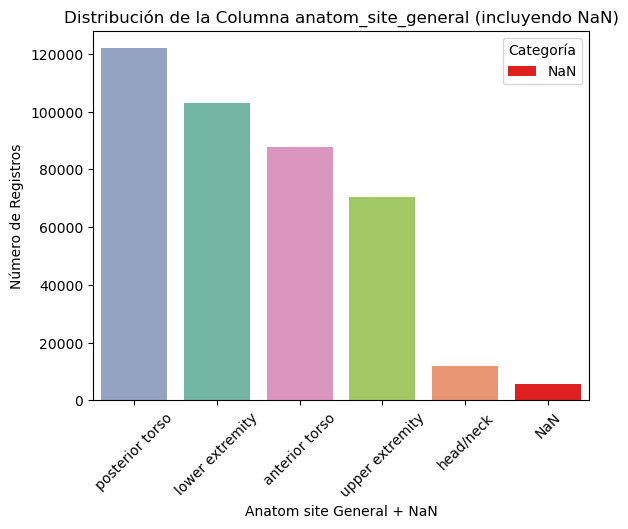

In [16]:
# Crear una columna 'anatom_site_general_nan' para marcar los valores nulos

metadata['anatom_site_general_nan'] = metadata['anatom_site_general'].astype(str).replace('nan', 'NaN')

# Graficar los valores no nulos en un color

sns.countplot(data=metadata[metadata['anatom_site_general_nan'] != 'NaN'], 
              x='anatom_site_general_nan', 
              order=metadata['anatom_site_general_nan'].value_counts().index, 
              palette='Set2', 
              hue='anatom_site_general_nan')

# Graficar los valores nulos en rojo
sns.countplot(data=metadata[metadata['anatom_site_general_nan'] == 'NaN'], 
              x='anatom_site_general_nan', 
              order=['NaN'], 
              color='red', 
              label='NaN')

# Añadir título y etiquetas
plt.title('Distribución de la Columna anatom_site_general (incluyendo NaN)')
plt.xlabel('Anatom site General + NaN')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

Ya tenemos las columnas con los datos NaN identificadas, las cuales trataremos mas adelante

Ahora, procedamos a eliminar columnas que aparecen totalmente vacias o con todas las variables iguales, tambien eliminaremos la columna patient_id

In [17]:
# Eliminar las columnas especificadas
metadata = metadata.drop(columns=['image_type', 'iddx_2', 'iddx_3','patient_id','mel_mitotic_index','iddx_4','anatom_site_general_nan','age_approx_nan','sex_nan','iddx_5'])

# Verificar que las columnas han sido eliminadas
print("Columnas restantes después de la eliminación:")
print(metadata.columns)

Columnas restantes después de la eliminación:
Index(['isic_id', 'target', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext',
       'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H',
       'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license',
       'lesion_id', 'iddx_full', 'iddx_1', 'mel_thick_mm',
       'tbp_lv_dnn_lesion_confidence'],
  

ya que esta limpio el dataset, procedemos a cambiar el indice por la columna "isic_id" para usarla como referencia ya que coincide con el nombre de las fotos que tenemos como parte del conjunto de entrenamiento y test 

In [18]:

# Cambiar el índice a la columna 'isic_id'
metadata.set_index('isic_id', inplace=True)

# Verificar que el cambio se ha realizado correctamente
metadata.head()  # Muestra las primeras filas del DataFrame con el nuevo índice

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,mel_thick_mm,tbp_lv_dnn_lesion_confidence
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,60.0,male,lower extremity,3.04,3D: white,20.244422,16.261975,26.922447,23.954773,...,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,97.517282
ISIC_0015845,0,60.0,male,head/neck,1.10,3D: white,31.712570,25.364740,26.331000,24.549290,...,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,3.141455
ISIC_0015864,0,60.0,male,posterior torso,3.40,3D: XP,22.575830,17.128170,37.970460,33.485410,...,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,99.804040
ISIC_0015902,0,65.0,male,anterior torso,3.22,3D: XP,14.242329,12.164757,21.448144,21.121356,...,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,99.989998
ISIC_0024200,0,55.0,male,anterior torso,2.73,3D: white,24.725520,20.057470,26.464900,25.710460,...,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,70.442510


para hacer mas entendible para los modelos de ML trabajaremos las columnas "tbp_lv_location" y "tbp_lv_location_simple" en la primera columna  hay informacion que se repite en la segunda  (tbp_lv_location_simple) de manera mas simple, pero como se repite, haremos una funcion para que realice un for por todo el dataframe, donde un condicional elimine de la primera columna (tbp_lv_location) el texto que se repite en  la segunda columna y el guion si existiese para que el resultado muestre en la primera columna la ubicacion especifica de la lesion, mientras que en la segunda solo muestre una ubicacion generalizada, teniendo dos opciones bien definidas para el aprendizaje.

In [19]:

def simplify_location(row):
    location = row['tbp_lv_location']
    simple_location = row['tbp_lv_location_simple']
    
    # Verificar si el texto en tbp_lv_location_simple está en tbp_lv_location
    if simple_location in location and simple_location != location:
        # Eliminar el texto de tbp_lv_location_simple de tbp_lv_location, y también los guiones
        simplified_location = location.replace(simple_location, '').replace('-', '').strip()
        return simplified_location
    # Si las dos columnas tienen el mismo texto o simple_location no está en location
    return location

# Aplicar la función a cada fila del DataFrame
metadata['tbp_lv_location'] = metadata.apply(simplify_location, axis=1)



# Mostrar el DataFrame para verificar los cambios
print(metadata[['tbp_lv_location', 'tbp_lv_location_simple']])

             tbp_lv_location tbp_lv_location_simple
isic_id                                            
ISIC_0015670           Upper              Right Leg
ISIC_0015845     Head & Neck            Head & Neck
ISIC_0015864       Top Third             Torso Back
ISIC_0015902        Top Half            Torso Front
ISIC_0024200        Top Half            Torso Front
...                      ...                    ...
ISIC_9999937        Top Half            Torso Front
ISIC_9999951       Top Third             Torso Back
ISIC_9999960        Top Half            Torso Front
ISIC_9999964     Bottom Half            Torso Front
ISIC_9999967           Lower               Left Leg

[401059 rows x 2 columns]


Eliminamos valores NaN que identificamos anteriormente, para evitar ruidos indeseados en el entrnamiento de los modelos

Crearemos un nuevo dataset con los registros que contienn valors Nan por si nos hacen falta mas adelante para eliminar el registro de fotografias en caso de entrenar un modelo con fotos y el Dataset limpio a la vez

In [20]:


# Identificar las filas con valores nulos en las columnas especificadas
columns_to_check = ['sex', 'age_approx', 'anatom_site_general']

nan_records = metadata[metadata[columns_to_check].isna().any(axis=1)]


metadata_cleaned = metadata.dropna(subset=columns_to_check)



# Guardar el DataFrame con valores nulos en un archivo CSV (manteniendo el índice.)
nan_records.to_csv('nan_records.csv', index=True)


# Guardar el DataFrame limpio en un archivo CSV (manteniendo el índice)
metadata_cleaned.to_csv('metadata_cleaned.csv', index=True)


print("\nDataFrame limpio:")
metadata_cleaned.head()


DataFrame limpio:


,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,mel_thick_mm,tbp_lv_dnn_lesion_confidence
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,60.0,male,lower extremity,3.04,3D: white,20.244422,16.261975,26.922447,23.954773,...,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,97.517282
ISIC_0015845,0,60.0,male,head/neck,1.10,3D: white,31.712570,25.364740,26.331000,24.549290,...,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,3.141455
ISIC_0015864,0,60.0,male,posterior torso,3.40,3D: XP,22.575830,17.128170,37.970460,33.485410,...,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,99.804040
ISIC_0015902,0,65.0,male,anterior torso,3.22,3D: XP,14.242329,12.164757,21.448144,21.121356,...,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,99.989998
ISIC_0024200,0,55.0,male,anterior torso,2.73,3D: white,24.725520,20.057470,26.464900,25.710460,...,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,70.442510


In [21]:
# Mostrar los DataFrames para verificar el dataset con los archivos NaN
print("DataFrame con valores nulos:")
nan_records.head()


DataFrame con valores nulos:


,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,mel_thick_mm,tbp_lv_dnn_lesion_confidence
isic_id,,,,,,,,,,,,,,,,,,,,,
ISIC_0073511,0,NaN,NaN,lower extremity,4.17,3D: XP,26.849594,18.519190,33.674085,31.680483,...,180.639832,626.009583,-38.519745,"Frazer Institute, The University of Queensland...",CC-BY,NaN,Benign,Benign,NaN,100.000000
ISIC_0073555,0,NaN,NaN,posterior torso,2.76,3D: XP,24.376506,17.991822,45.133600,40.020591,...,93.717445,1389.841187,110.792175,"Frazer Institute, The University of Queensland...",CC-BY,NaN,Benign,Benign,NaN,99.999642
ISIC_0073672,0,55.0,NaN,lower extremity,3.00,3D: XP,16.715690,11.191430,25.456380,23.979060,...,-113.388100,797.659700,-25.399170,University Hospital of Basel,CC-BY-NC,NaN,Benign,Benign,NaN,99.999870
ISIC_0073934,0,55.0,NaN,lower extremity,2.60,3D: XP,18.151000,12.677940,34.842930,31.275510,...,-191.333300,847.401600,103.641400,University Hospital of Basel,CC-BY-NC,NaN,Benign,Benign,NaN,99.996710
ISIC_0073937,0,65.0,male,NaN,3.70,3D: XP,20.071853,15.510342,33.733257,30.006815,...,-268.299316,221.390076,48.944092,"Frazer Institute, The University of Queensland...",CC-BY,NaN,Benign,Benign,NaN,99.986982


Como hemos creado un dataset nuevo con los registros eliminados, nos aprovecharemos del index para hacer un filtrado de imagenes para que tengamos la misma dimension con respecto a los registros del dataset y la carpeta de fotografia, creando carpetas con las fotografias de los registros que hemos eliminado del dataset original y el resto de las fotografias correspondiente al nuevo dataset. 

In [22]:
"""dejaremos los procesos de esta celda comentado para que no se repitan por error

#importamos la libreria Shutil, nos permitirá realizar la orden de copiar los archivos de fotografia
import shutil


# Definir las rutas
nan_csv_path = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/src/nan_records.csv'
filtered_csv_path = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/src/metadata_cleaned.csv'
source_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/train-image/image'
na_images_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/NaN_images'
filtered_images_folder = '/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/Filtered_images'

# Crear carpetas de destino si no existen
os.makedirs(na_images_folder, exist_ok=True)
os.makedirs(filtered_images_folder, exist_ok=True)

# Leer los CSVs y obtener los índices de las imágenes
df_nan_records = pd.read_csv(nan_csv_path, index_col=0)
df_filtered_records = pd.read_csv(filtered_csv_path, index_col=0)

nan_indices = set(df_nan_records.index.tolist())  # Usar sets para buscar más rápido
filtered_indices = set(df_filtered_records.index.tolist())

# Definir el tamaño del lote, el cual limitamos a 1000 para que no ocupe toda la memoria disponible
batch_size = 1000

# Listar todas las imágenes en la carpeta de origen 
all_images = [f for f in os.listdir(source_folder) if f.endswith('.jpg')]

# Inicializar contadores
count_na_images = 0
count_filtered_images = 0

# Procesar imágenes en lotes
for i in range(0, len(all_images), batch_size):
    batch = all_images[i:i + batch_size]

    # Procesar cada imagen en el lote
    for image_name in batch:
        base_name = os.path.splitext(image_name)[0]  # Obtener el nombre base sin extensión

        if base_name in nan_indices:
            shutil.copy(os.path.join(source_folder, image_name), os.path.join(na_images_folder, image_name))
            count_na_images += 1

        elif base_name in filtered_indices:
            shutil.copy(os.path.join(source_folder, image_name), os.path.join(filtered_images_folder, image_name))
            count_filtered_images += 1

    # Liberar memoria después de cada lote
    del batch

    # Mostrar progreso
    print(f"Lote {i // batch_size + 1} procesado.")

# Imprimir resultados finales
total_copied = count_na_images + count_filtered_images
print(f"Imágenes copiadas a 'NaN_images': {count_na_images}")
print(f"Imágenes copiadas a 'Filtered_images': {count_filtered_images}")
print(f"Total de imágenes copiadas: {total_copied}")"""

'dejaremos los procesos de esta celda comentado para que no se repitan por error\n\n#importamos la libreria Shutil, nos permitirá realizar la orden de copiar los archivos de fotografia\nimport shutil\n\n\n# Definir las rutas\nnan_csv_path = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/src/nan_records.csv\'\nfiltered_csv_path = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Proyecto_Final_Cancer/src/metadata_cleaned.csv\'\nsource_folder = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/train-image/image\'\nna_images_folder = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/NaN_images\'\nfiltered_images_folder = \'/Users/luiseduardogarciablanco/Desktop/bootcamp/Archivos_proyecto_cancer/isic-2024-challenge/Filtered_images\'\n\n# Crear carpetas de destino si no existen\nos.makedirs(na_images_folder, exist_ok=True)\nos.makedirs(filtered_images_folder, exist_ok=True)\n\n